In [23]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data.csv', sep=',')
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')

covid_data  #данные о показателях заболеваемости за каждый день в различных регионах 187 стран.



        # date — дата наблюдения;
        # province/state — наименование провинции/штата;
        # country — наименование страны;
        # confirmed — общее число зафиксированных случаев на указанный день;
        # deaths — общее число зафиксированных смертей на указанный день;
        # recovered — общее число выздоровлений на указанный день.
        
vaccinations_data = vaccinations_data[['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]   #данные о процессе вакцинирования людей в 221 стране мира. 
#vaccinations_data
# Данная таблица содержит следующие столбцы:

#         country — наименование страны;
#         date — дата наблюдения;
#         total_vaccinations — общее число введённых вакцин в стране на указанный день;
#         people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
#         people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день 
#                                         (рассчитывается как people_vaccinated/population*100 );
#         people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
#         people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день 
#                                               (рассчитывается как people_fully_vaccinated/popylation*100);
#         daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
#         vaccines — комбинации вакцин, используемые в стране.
covid_data

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,05/29/2021,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,05/29/2021,Zeeland,Netherlands,29147.0,245.0,0.0
306426,05/29/2021,Zhejiang,China,1364.0,1.0,1324.0
306427,05/29/2021,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0


In [24]:
# Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам.
# Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed','deaths', 'recovered']].sum()
covid_data

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


In [25]:
#Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [26]:
# Создаем признак больных на данный момент(active). 
# Для этого вычитаем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов 
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data


,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


In [27]:
# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей.
# Для этого отсортируем данные по названиям стран, а затем по датам.
# После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data= covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [32]:
#За какой период представлены данные в таблице covid_data? 
#Подсказка (1 из 1): Для определения периода можно найти максимум и минимум в столбце date таблицы covid_data.
print(covid_data['date'].min(), covid_data['date'].max())
print(vaccinations_data['date'].min(), vaccinations_data['date'].max())


2020-01-22 00:00:00 2021-05-29 00:00:00
2020-12-02 00:00:00 2021-09-06 00:00:00


In [42]:
# С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
# Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1.
# То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более.
# Результат объединения занесите в переменную covid_df.
# Подсказка (1 из 1): Для объединения по нескольким столбцам передайте в параметр метода merge() список с именами ключей.
covid_df = covid_data.merge(vaccinations_data, on= ['date', 'country'], how='left')
covid_df


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# В получившейся  covid_df создайте признаки death_rate — 
# общий процент смертей среди зафиксированных случаев (летальность) и recover_rate —
# общий процент случаев выздоровления.
# Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered)
# к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recovered_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100
print(round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2))


7.19


In [47]:
#Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.
round(covid_df[covid_df['country'] == 'Russia']['recovered_rate'].mean(), 2)

67.06

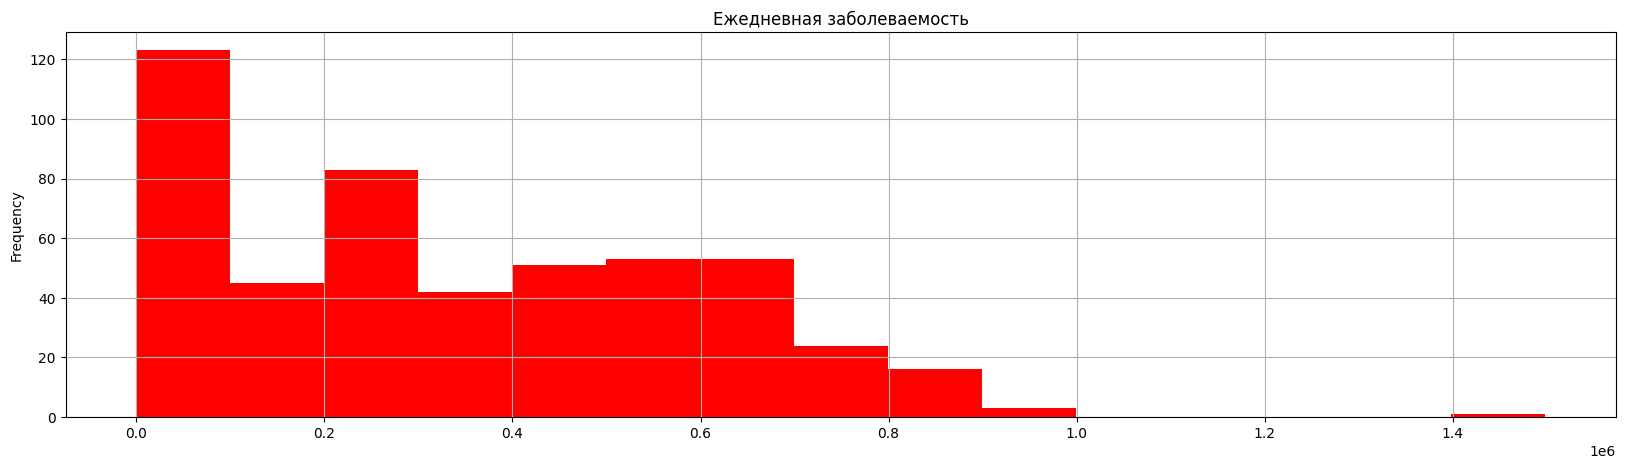

In [56]:
# Начнём с исследования заболеваемости коронавирусом во всём мире.
# Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени.
# Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='hist',
    figsize=(20,5),
    title='Ежедневная заболеваемость',
    grid=True,
    bins=15,
    color='red'
    
    
);


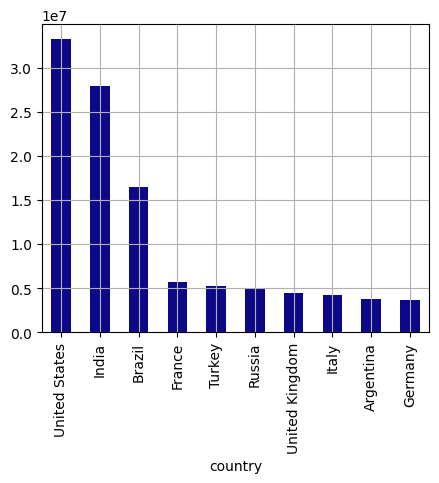

In [61]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country= grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(5,4),
    colormap='plasma'
);

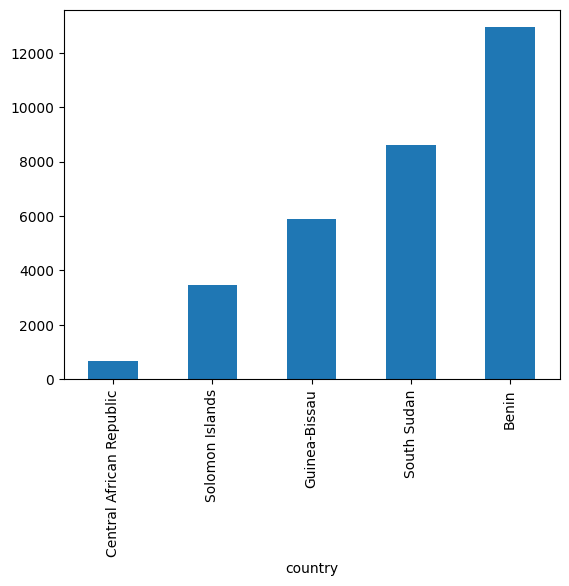

In [62]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

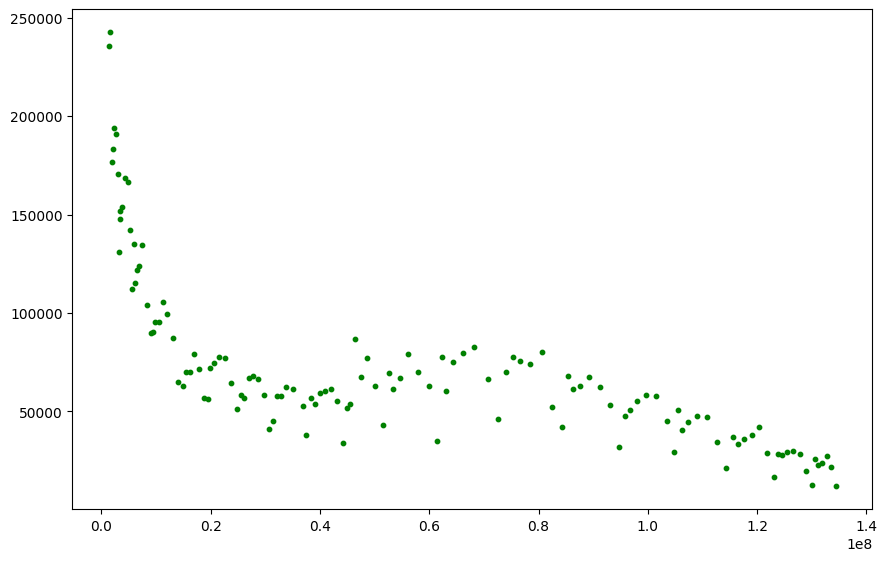

In [69]:
import matplotlib.pyplot as ptl
#ptl.style.use('default')
#fig = ptl.figure(figsize=(5, 5))
#axes = fig.add_axes([0,0,1,1])
us_data = covid_df[covid_df['country'] == 'United States']

fig = ptl.figure(figsize=(8,5))
axes = fig.add_axes([0,0,1,1])
axes.scatter(
    x= us_data['people_fully_vaccinated'],
    y= us_data['daily_confirmed'],
    s=10,
    marker='o',
    c='green'
    
);

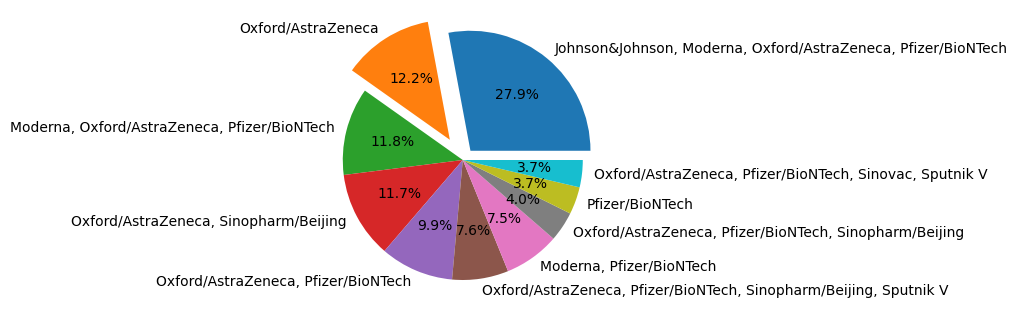

In [79]:
# ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts().
# Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы.
# Будем отображать доли в процентах и округлять их до одного знака после запятой.
# Самую распространённую вакцину сместим на 10 % от центра:

vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = ptl.figure(figsize=(3,3))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1,0.2,0,0,0,0,0,0,0,0]
);